## Exploratory Data Analysis for Bati bank

In [46]:
import pandas as pd
import sys

In [47]:
import sys
print(sys.executable)


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Scripts\python.exe


## Overview of the data

In [49]:
df = pd.read_csv('../data/data.csv')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [51]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## Feature Engineering

In [52]:
# Aggregate features grouped by 'CustomerId'
aggregate_features = df.groupby('CustomerId').agg(
    total_transaction_amount=('Amount', 'sum'),
    average_transaction_amount=('Amount', 'mean'),
    transaction_count=('TransactionId', 'count'),
    std_transaction_amount=('Amount', 'std'),
    total_value=('Value', 'sum')
).reset_index()

# Display the aggregated features
print(aggregate_features.head())

        CustomerId  total_transaction_amount  average_transaction_amount  \
0     CustomerId_1                  -10000.0               -10000.000000   
1    CustomerId_10                  -10000.0               -10000.000000   
2  CustomerId_1001                   20000.0                 4000.000000   
3  CustomerId_1002                    4225.0                  384.090909   
4  CustomerId_1003                   20000.0                 3333.333333   

   transaction_count  std_transaction_amount  total_value  
0                  1                     NaN        10000  
1                  1                     NaN        10000  
2                  5             6558.963333        30400  
3                 11              560.498966         4775  
4                  6             6030.478146        32000  


In [53]:
# Convert 'TransactionStartTime' to datetime
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

In [54]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


In [55]:


# Extract features from 'TransactionStartTime'
df['transaction_hour'] = df['TransactionStartTime'].dt.hour
df['transaction_day'] = df['TransactionStartTime'].dt.day
df['transaction_month'] = df['TransactionStartTime'].dt.month
df['transaction_year'] = df['TransactionStartTime'].dt.year

# Display the extracted features
print(df[['TransactionStartTime', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year']].head())


       TransactionStartTime  transaction_hour  transaction_day  \
0 2018-11-15 02:18:49+00:00                 2               15   
1 2018-11-15 02:19:08+00:00                 2               15   
2 2018-11-15 02:44:21+00:00                 2               15   
3 2018-11-15 03:32:55+00:00                 3               15   
4 2018-11-15 03:34:21+00:00                 3               15   

   transaction_month  transaction_year  
0                 11              2018  
1                 11              2018  
2                 11              2018  
3                 11              2018  
4                 11              2018  


In [56]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [57]:
# One-Hot Encode 'ProductCategory', CurrencyCode, CountryCode ProductId ProductCategory and 'ChannelId'
df_encoded = pd.get_dummies(df, columns=['ProductCategory', 'ChannelId', 'CurrencyCode', 'CountryCode', 'ProductId','FraudResult'], drop_first=True)

# Display the encoded columns
print(df_encoded.head())


         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  TransactionId_28195   BatchId_38780  AccountId_4841  SubscriptionId_3829   

        CustomerId    ProviderId   Amount  Value      TransactionStartTime  \
0  CustomerId_4406  ProviderId_6   1000.0   1000 2018-11-15 02:18:49+00:00   
1  CustomerId_4406  ProviderId_4    -20.0     20 2018-11-15 02:19:08+00:00   
2  CustomerId_4683  ProviderId_6    500.0    500 2018-11-15 02:44:21+00:00   
3   CustomerId_988  ProviderId_1  20000.0  21800 2018-11-15 03:32:55+00:00   
4   CustomerId_988  ProviderId_4   -644.0    644 2018-11-15 03:34:21+00:00   

   PricingStrategy  ...  ProductId_ProductId_24  Product

In [58]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   TransactionId                       95662 non-null  object             
 1   BatchId                             95662 non-null  object             
 2   AccountId                           95662 non-null  object             
 3   SubscriptionId                      95662 non-null  object             
 4   CustomerId                          95662 non-null  object             
 5   ProviderId                          95662 non-null  object             
 6   Amount                              95662 non-null  float64            
 7   Value                               95662 non-null  int64              
 8   TransactionStartTime                95662 non-null  datetime64[ns, UTC]
 9   PricingStrategy                     956

In [59]:
df_encoded.isnull().sum()

TransactionId                         0
BatchId                               0
AccountId                             0
SubscriptionId                        0
CustomerId                            0
ProviderId                            0
Amount                                0
Value                                 0
TransactionStartTime                  0
PricingStrategy                       0
transaction_hour                      0
transaction_day                       0
transaction_month                     0
transaction_year                      0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0
ProductCategory_other                 0
ProductCategory_ticket                0
ProductCategory_transport             0
ProductCategory_tv                    0
ProductCategory_utility_bill          0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0
ChannelId_ChannelId_5                 0


In [60]:
df_encoded.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,Amount,Value,TransactionStartTime,PricingStrategy,...,ProductId_ProductId_24,ProductId_ProductId_27,ProductId_ProductId_3,ProductId_ProductId_4,ProductId_ProductId_5,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,FraudResult_1
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,1000.0,1000,2018-11-15 02:18:49+00:00,2,...,False,False,False,False,False,False,False,False,False,False
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,-20.0,20,2018-11-15 02:19:08+00:00,2,...,False,False,False,False,False,True,False,False,False,False
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,500.0,500,2018-11-15 02:44:21+00:00,2,...,False,False,False,False,False,False,False,False,False,False
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,20000.0,21800,2018-11-15 03:32:55+00:00,2,...,False,False,False,False,False,False,False,False,False,False
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,-644.0,644,2018-11-15 03:34:21+00:00,2,...,False,False,False,False,False,True,False,False,False,False


In [61]:
from sklearn.preprocessing import LabelEncoder

# Initialize Label Encoder
le = LabelEncoder()

# Encode 'ProviderId' and 'PricingStrategy' TransactionId BatchId AccountId SubscriptionId CustomerId
df['ProviderId'] = le.fit_transform(df['ProviderId'])
df['PricingStrategy'] = le.fit_transform(df['PricingStrategy'])
df['TransactionId'] = le.fit_transform(df['TransactionId'])
df['BatchId'] = le.fit_transform(df['BatchId'])
df['AccountId'] = le.fit_transform(df['AccountId'])
df['SubscriptionId'] = le.fit_transform(df['SubscriptionId'])
df['CustomerId'] = le.fit_transform(df['CustomerId'])

# Display the encoded variables
print(df[['ProviderId', 'PricingStrategy', 'CustomerId', 'TransactionId', 'BatchId','AccountId','SubscriptionId']].head())


   ProviderId  PricingStrategy  CustomerId  TransactionId  BatchId  AccountId  \
0           5                2        2584          78150    46980       2490   
1           3                2        2584          75821    31755       3219   
2           5                2        2806          39888    60272       2713   
3           0                2        3733          48738     1797       3351   
4           3                2        3733          41364    48941       3219   

   SubscriptionId  
0            3535  
1            2366  
2             996  
3             974  
4            2366  


In [62]:
# Check for missing values
df.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
transaction_hour        0
transaction_day         0
transaction_month       0
transaction_year        0
dtype: int64

In [63]:
aggregate_features.isnull().sum()

CustomerId                      0
total_transaction_amount        0
average_transaction_amount      0
transaction_count               0
std_transaction_amount        712
total_value                     0
dtype: int64

In [64]:
# Imputation example using mean for numerical features
aggregate_features['std_transaction_amount'] = aggregate_features['std_transaction_amount'].fillna(aggregate_features['std_transaction_amount'].mean())

In [65]:
aggregate_features.isnull().sum()

CustomerId                    0
total_transaction_amount      0
average_transaction_amount    0
transaction_count             0
std_transaction_amount        0
total_value                   0
dtype: int64

In [67]:
aggregate_features.head()

,CustomerId,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,total_value
0,CustomerId_1,-10000.0,-10000.000000,1,16802.155720,10000
1,CustomerId_10,-10000.0,-10000.000000,1,16802.155720,10000
2,CustomerId_1001,20000.0,4000.000000,5,6558.963333,30400
3,CustomerId_1002,4225.0,384.090909,11,560.498966,4775
4,CustomerId_1003,20000.0,3333.333333,6,6030.478146,32000


In [68]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_features = ['total_transaction_amount', 'average_transaction_amount', 'transaction_count', 'std_transaction_amount', 'total_value']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the data
aggregate_features[numerical_features] = scaler.fit_transform(aggregate_features[numerical_features])

# Display the scaled features
print(aggregate_features.head())


        CustomerId  total_transaction_amount  average_transaction_amount  \
0     CustomerId_1                 -0.066891                   -0.153364   
1    CustomerId_10                 -0.066891                   -0.153364   
2  CustomerId_1001                 -0.055849                   -0.069870   
3  CustomerId_1002                 -0.061655                   -0.091435   
4  CustomerId_1003                 -0.055849                   -0.073846   

   transaction_count  std_transaction_amount  total_value  
0          -0.253459                0.000000    -0.089524  
1          -0.253459                0.000000    -0.089524  
2          -0.212186               -0.105976    -0.082011  
3          -0.150278               -0.168036    -0.091448  
4          -0.201868               -0.111444    -0.081422  


In [69]:
aggregate_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerId                  3742 non-null   object 
 1   total_transaction_amount    3742 non-null   float64
 2   average_transaction_amount  3742 non-null   float64
 3   transaction_count           3742 non-null   float64
 4   std_transaction_amount      3742 non-null   float64
 5   total_value                 3742 non-null   float64
dtypes: float64(5), object(1)
memory usage: 175.5+ KB


In [70]:
# Convert CustomerId to string type in both DataFrames
df_encoded['CustomerId'] = df_encoded['CustomerId'].astype(str)
aggregate_features['CustomerId'] = aggregate_features['CustomerId'].astype(str)

# Now, merge the datasets
df_merged = pd.merge(df_encoded, aggregate_features, on='CustomerId', how='left')

# Check the shape after merging
print(f"Shape of merged dataset: {df_merged.shape}")



Shape of merged dataset: (95662, 53)


In [71]:
# Check for missing values
print(df_merged.isnull().sum())


TransactionId                         0
BatchId                               0
AccountId                             0
SubscriptionId                        0
CustomerId                            0
ProviderId                            0
Amount                                0
Value                                 0
TransactionStartTime                  0
PricingStrategy                       0
transaction_hour                      0
transaction_day                       0
transaction_month                     0
transaction_year                      0
ProductCategory_data_bundles          0
ProductCategory_financial_services    0
ProductCategory_movies                0
ProductCategory_other                 0
ProductCategory_ticket                0
ProductCategory_transport             0
ProductCategory_tv                    0
ProductCategory_utility_bill          0
ChannelId_ChannelId_2                 0
ChannelId_ChannelId_3                 0
ChannelId_ChannelId_5                 0


In [74]:
df_merged.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,Amount,Value,TransactionStartTime,PricingStrategy,...,ProductId_ProductId_6,ProductId_ProductId_7,ProductId_ProductId_8,ProductId_ProductId_9,FraudResult_1,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,total_value
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,1000.0,1000,2018-11-15 02:18:49+00:00,2,...,False,False,False,False,False,-0.022752,-0.088217,0.964082,-0.142359,-0.018139
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,-20.0,20,2018-11-15 02:19:08+00:00,2,...,True,False,False,False,False,-0.022752,-0.088217,0.964082,-0.142359,-0.018139
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,500.0,500,2018-11-15 02:44:21+00:00,2,...,False,False,False,False,False,-0.062842,-0.090744,-0.243141,-0.173835,-0.092838
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,20000.0,21800,2018-11-15 03:32:55+00:00,2,...,False,False,False,False,False,0.020976,-0.057828,0.128312,0.003798,0.012344
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,-644.0,644,2018-11-15 03:34:21+00:00,2,...,True,False,False,False,False,0.020976,-0.057828,0.128312,0.003798,0.012344


In [73]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,transaction_hour,transaction_day,transaction_month,transaction_year
0,78150,46980,2490,3535,2584,UGX,256,5,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0,2,15,11,2018
1,75821,31755,3219,2366,2584,UGX,256,3,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0,2,15,11,2018
2,39888,60272,2713,996,2806,UGX,256,5,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0,2,15,11,2018
3,48738,1797,3351,974,3733,UGX,256,0,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0,3,15,11,2018
4,41364,48941,3219,2366,3733,UGX,256,3,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0,3,15,11,2018


In [75]:
aggregate_features.head()

,CustomerId,total_transaction_amount,average_transaction_amount,transaction_count,std_transaction_amount,total_value
0,CustomerId_1,-0.066891,-0.153364,-0.253459,0.000000,-0.089524
1,CustomerId_10,-0.066891,-0.153364,-0.253459,0.000000,-0.089524
2,CustomerId_1001,-0.055849,-0.069870,-0.212186,-0.105976,-0.082011
3,CustomerId_1002,-0.061655,-0.091435,-0.150278,-0.168036,-0.091448
4,CustomerId_1003,-0.055849,-0.073846,-0.201868,-0.111444,-0.081422


## Compute RFMS score

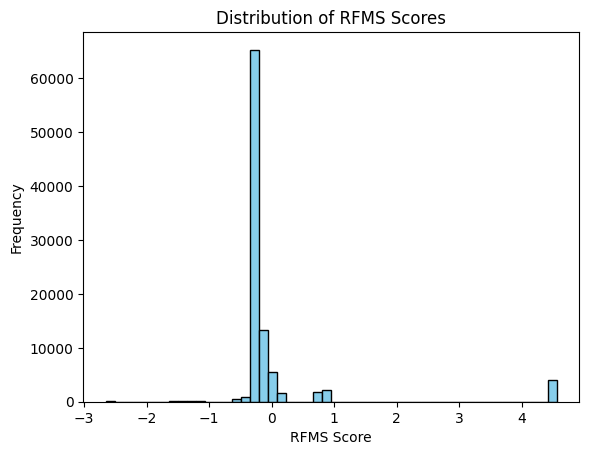

In [76]:
# Calculate RFMS score (you can adjust the weights as needed)
df_merged['RFMS_score'] = (
    0.25 * df_merged['average_transaction_amount'] +   # Monetary
    0.25 * df_merged['transaction_count'] +            # Frequency
    0.25 * -df_merged['std_transaction_amount'] +      # Stability (inverted)
    0.25 * -df_merged['total_transaction_amount']      # Recency (inverted if recency is represented by time since last transaction)
)

# Standardize the RFMS score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_merged['RFMS_score'] = scaler.fit_transform(df_merged[['RFMS_score']])

# Visualize the distribution of RFMS score
import matplotlib.pyplot as plt

plt.hist(df_merged['RFMS_score'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of RFMS Scores")
plt.xlabel("RFMS Score")
plt.ylabel("Frequency")
plt.show()


## Modeling

In [77]:
# Define a threshold (e.g., 0 as the median score)
df_merged['default_label'] = df_merged['RFMS_score'].apply(lambda x: 'bad' if x < 0 else 'good')

# Check the distribution of labels
print(df_merged['default_label'].value_counts())


default_label
bad     84237
good    11425
Name: count, dtype: int64


In [81]:
print(df_merged.columns.tolist())


['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'transaction_hour', 'transaction_day', 'transaction_month', 'transaction_year', 'ProductCategory_data_bundles', 'ProductCategory_financial_services', 'ProductCategory_movies', 'ProductCategory_other', 'ProductCategory_ticket', 'ProductCategory_transport', 'ProductCategory_tv', 'ProductCategory_utility_bill', 'ChannelId_ChannelId_2', 'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'ProductId_ProductId_10', 'ProductId_ProductId_11', 'ProductId_ProductId_12', 'ProductId_ProductId_13', 'ProductId_ProductId_14', 'ProductId_ProductId_15', 'ProductId_ProductId_16', 'ProductId_ProductId_19', 'ProductId_ProductId_2', 'ProductId_ProductId_20', 'ProductId_ProductId_21', 'ProductId_ProductId_22', 'ProductId_ProductId_23', 'ProductId_ProductId_24', 'ProductId_ProductId_27', 'ProductId_ProductId_3', 'ProductId_ProductId_4', 'ProductId_ProductId_5', '

In [82]:
# Define the correct feature columns based on what is available
feature_columns = [
    'std_transaction_amount',
    'total_transaction_amount',
    'transaction_count',
    'average_transaction_amount'
]

# Define the target variable
X = df_merged[feature_columns]
y = df_merged['default_label'].map({'good': 0, 'bad': 1})

# Split the data (80% training, 20% testing)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train Logistic Regression
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Predictions
y_pred_logistic = logistic_model.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



In [84]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



In [85]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train GBM
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm_model.predict(X_test)

# Evaluation
print("GBM Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))


GBM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



In [86]:
from sklearn.metrics import roc_auc_score

# Calculate ROC-AUC scores
roc_auc_logistic = roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_gbm = roc_auc_score(y_test, gbm_model.predict_proba(X_test)[:, 1])

print("ROC-AUC Logistic Regression:", roc_auc_logistic)
print("ROC-AUC Random Forest:", roc_auc_rf)
print("ROC-AUC GBM:", roc_auc_gbm)


ROC-AUC Logistic Regression: 1.0
ROC-AUC Random Forest: 1.0
ROC-AUC GBM: 1.0


In [87]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
logistic_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Evaluate the models
for model, name in zip([logistic_model, rf_model, gbm_model], 
                       ['Logistic Regression', 'Random Forest', 'GBM']):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



Model: Random Forest
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



Model: GBM
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00

In [88]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_logistic = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'saga']
}

# Initialize Grid Search
grid_search_logistic = GridSearchCV(logistic_model, param_grid_logistic, 
                                    cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_logistic.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters (Logistic Regression):", grid_search_logistic.best_params_)
print("Best Score:", grid_search_logistic.best_score_)


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
125 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **k

Best Parameters (Logistic Regression): {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 1.0


In [89]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define parameter grid
param_dist_rf = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Search
random_search_rf = RandomizedSearchCV(rf_model, param_dist_rf, 
                                      n_iter=50, cv=5, random_state=42, 
                                      scoring='accuracy', n_jobs=-1)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters (Random Forest):", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)


Best Parameters (Random Forest): {'n_estimators': np.int64(150), 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
Best Score: 1.0


In [90]:
# Define parameter grid
param_grid_gbm = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize Grid Search
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, 
                               cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search_gbm.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters (GBM):", grid_search_gbm.best_params_)
print("Best Score:", grid_search_gbm.best_score_)


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters (GBM): {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best Score: 1.0


In [91]:
# Retrain the models with the best parameters
logistic_best = grid_search_logistic.best_estimator_
rf_best = random_search_rf.best_estimator_
gbm_best = grid_search_gbm.best_estimator_

# Evaluate on the test set
for model, name in zip([logistic_best, rf_best, gbm_best], 
                       ['Logistic Regression', 'Random Forest', 'GBM']):
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print("Final Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Model: Logistic Regression
Final Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



Model: Random Forest
Final Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00     19133
   macro avg       1.00      1.00      1.00     19133
weighted avg       1.00      1.00      1.00     19133



Model: GBM
Final Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00     16850

    accuracy                           1.00 

Model: Logistic Regression
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000




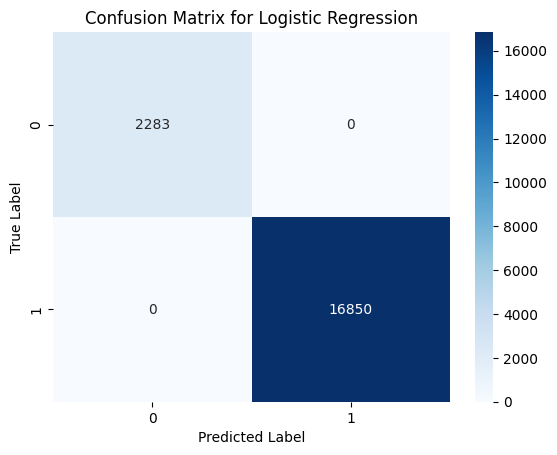

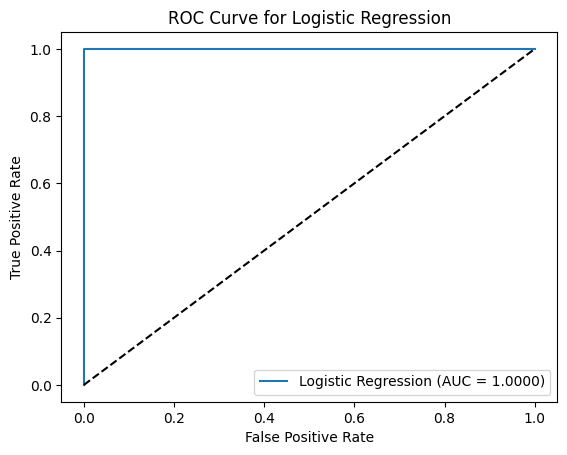

Model: Random Forest
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000




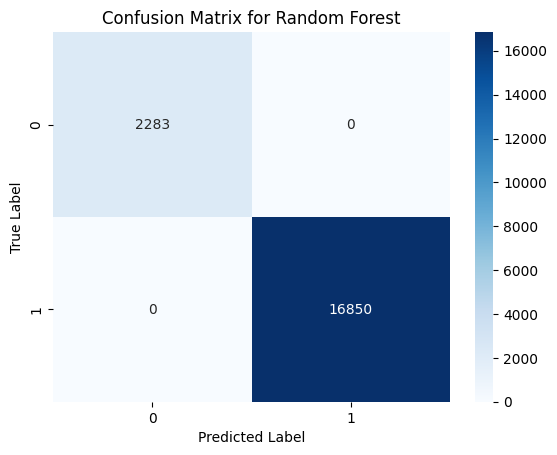

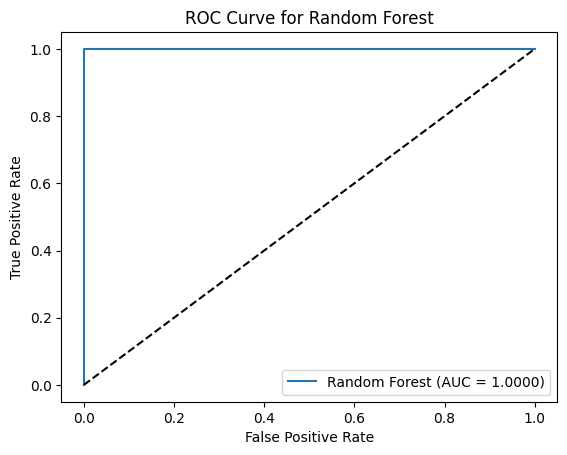

Model: GBM
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000




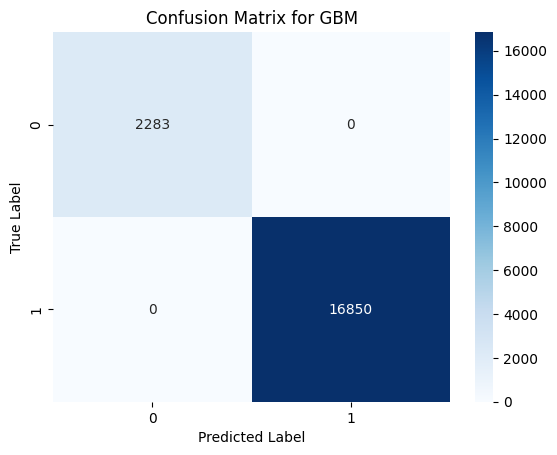

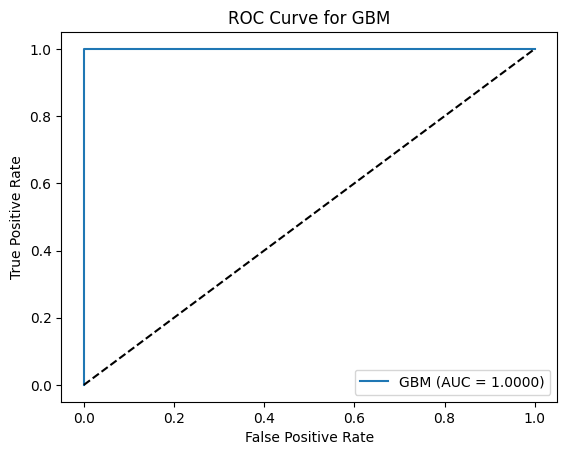

In [92]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to evaluate the models
def evaluate_model(model, X_test, y_test, model_name):
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # Probability scores for the positive class

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Print the metrics
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print("\n" + "="*50 + "\n")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"ROC Curve for {model_name}")
    plt.legend()
    plt.show()

# Evaluate the best models from hyperparameter tuning
evaluate_model(logistic_best, X_test, y_test, "Logistic Regression")
evaluate_model(rf_best, X_test, y_test, "Random Forest")
evaluate_model(gbm_best, X_test, y_test, "GBM")


## Default estimator and WoE binning

In [78]:
import scorecardpy as sc

# Define the target variable and feature set for WoE binning
target = 'default_label'
features = ['average_transaction_amount', 'transaction_count', 'std_transaction_amount', 'total_transaction_amount']

# Perform WoE binning
bins = sc.woebin(df_merged, y=target, x=features)

# Convert features to WoE values
df_woe = sc.woebin_ply(df_merged, bins)

# Display the first few rows of WoE transformed data
print(df_woe.head())


[INFO] creating woe binning ...


c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\scorecardpy\condition_fun.py:141: UserWarning: The positive value in "default_label" was replaced by 1 and negative value by 0.
  warnings.warn("The positive value in \"{}\" was replaced by 1 and negative value by 0.".format(y))
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
c:\Users\NurselamHussen-ZOAEt\Downloads\New folder\10 Academy-project\Week-6\.venv\Lib\site-packages\scorecardpy\condition_fun.py:40: FutureWarning: errors='ignore' is deprecated and will raise in a future versi

[INFO] converting into woe values ...
Woe transformating on 95662 rows and 4 columns in 00:00:17
        SubscriptionId        TransactionId  transaction_day  \
0   SubscriptionId_887  TransactionId_76871               15   
1  SubscriptionId_3829  TransactionId_73770               15   
2   SubscriptionId_222  TransactionId_26203               15   
3  SubscriptionId_2185    TransactionId_380               15   
4  SubscriptionId_3829  TransactionId_28195               15   

   ProductId_ProductId_13  ProductId_ProductId_16  ProductId_ProductId_27  \
0                   False                   False                   False   
1                   False                   False                   False   
2                   False                   False                   False   
3                   False                   False                   False   
4                   False                   False                   False   

   ProductCategory_ticket  ProductId_ProductId_20  Valu

{'average_transaction_amount': <Figure size 640x480 with 2 Axes>,
 'transaction_count': <Figure size 640x480 with 2 Axes>,
 'std_transaction_amount': <Figure size 640x480 with 2 Axes>,
 'total_transaction_amount': <Figure size 640x480 with 2 Axes>}

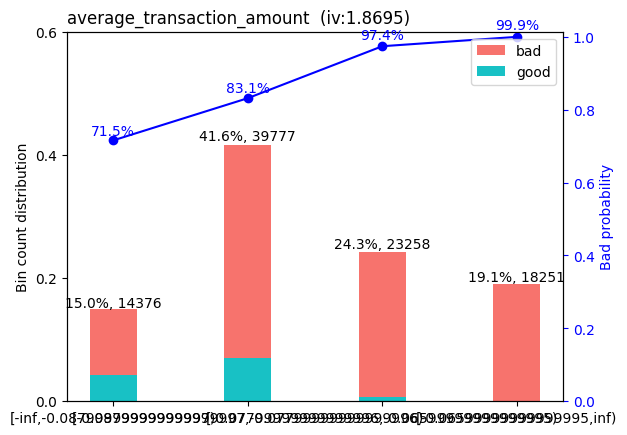

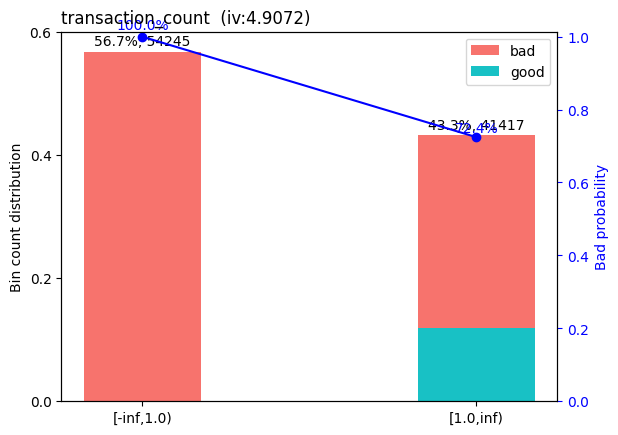

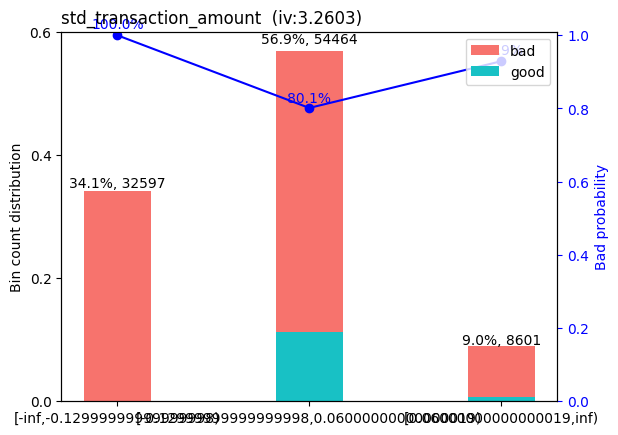

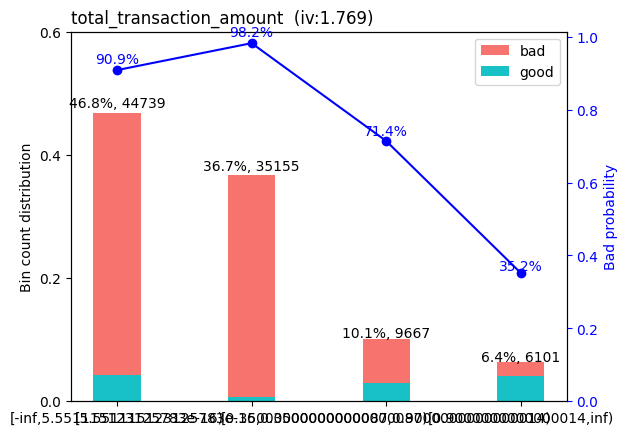

In [79]:
# Plot WoE for each feature
sc.woebin_plot(bins)


## Save the Model

In [93]:
import joblib

# Save the models
joblib.dump(logistic_best, 'logistic_regression_model.pkl')
joblib.dump(rf_best, 'random_forest_model.pkl')
joblib.dump(gbm_best, 'gbm_model.pkl')

print("Models have been saved successfully!")


Models have been saved successfully!
